# Projeto 2 - Classificador Automático de Sentimento

Você foi contratado por uma empresa parar analisar como os clientes estão reagindo a um determinado produto no Twitter. A empresa deseja que você crie um programa que irá analisar as mensagens disponíveis e classificará como "relevante" ou "irrelevante". Com isso ela deseja que mensagens negativas, que denigrem o nome do produto, ou que mereçam destaque, disparem um foco de atenção da área de marketing.<br /><br />
Como aluno de Ciência dos Dados, você lembrou do Teorema de Bayes, mais especificamente do Classificador Naive-Bayes, que é largamente utilizado em filtros anti-spam de e-mails. O classificador permite calcular qual a probabilidade de uma mensagem ser relevante dadas as palavras em seu conteúdo.<br /><br />
Para realizar o MVP (*minimum viable product*) do projeto, você precisa implementar uma versão do classificador que "aprende" o que é relevante com uma base de treinamento e compara a performance dos resultados com uma base de testes.<br /><br />
Após validado, o seu protótipo poderá também capturar e classificar automaticamente as mensagens da plataforma.

## Informações do Projeto

Prazo: 13/Set até às 23:59.<br />
Grupo: 1 ou 2 pessoas.<br /><br />
Entregáveis via GitHub: 
* Arquivo notebook com o código do classificador, seguindo as orientações abaixo.
* Arquivo Excel com as bases de treinamento e teste totalmente classificado.

**NÃO disponibilizar o arquivo com os *access keys/tokens* do Twitter.**


### Check 3: 

Até o dia 06 de Setembro às 23:59, o notebook e o xlsx devem estar no Github com as seguintes evidências: 
    * Conta no twitter criada.
    * Produto escolhido.
    * Arquivo Excel contendo a base de treinamento e teste já classificado.

Sugestão de leitura:<br />
http://docs.tweepy.org/en/v3.5.0/index.html<br />
https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/

___

## Preparando o ambiente

Instalando a biblioteca *tweepy* para realizar a conexão com o Twitter:

In [1]:
%%capture

#Instalando o tweepy
#!pip install tweepy

Importando as Bibliotecas que serão utilizadas. Esteja livre para adicionar outras.

In [2]:
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle

___
## Autenticando no  Twitter

Para realizar a captura dos dados é necessário ter uma conta cadastrada no twitter:

* Conta: ***@arthur_juan***


1. Caso ainda não tenha uma: https://twitter.com/signup
1. Depois é necessário registrar um app para usar a biblioteca: https://apps.twitter.com/
1. Dentro do registro do App, na aba Keys and Access Tokens, anotar os seguintes campos:
    1. Consumer Key (API Key)
    1. Consumer Secret (API Secret)
1. Mais abaixo, gere um Token e anote também:
    1. Access Token
    1. Access Token Secret
    
1. Preencha os valores no arquivo "auth.pass"

**ATENÇÃO**: Nunca divulgue os dados desse arquivo online (GitHub, etc). Ele contém as chaves necessárias para realizar as operações no twitter de forma automática e portanto é equivalente a ser "hackeado". De posse desses dados, pessoas mal intencionadas podem fazer todas as operações manuais (tweetar, seguir, bloquear/desbloquear, listar os seguidores, etc). Para efeito do projeto, esse arquivo não precisa ser entregue!!!

In [3]:
#    API KEY: ZpsQt4djTkQaRfHdIvwM4OVEQ
#    API Scret: qnAxY4HpajivQq76Gmz5uzks4Dp5AwMgZh5wopLI0vOYzEZs83
#
#    Access Token: 904543009957715968-zw2LsSLpUxRXol9z6FxatNjUAT01Wbh
#    Access Token Secret: dPULw1D3Q0fvF6CntlbTFvDdn3jO7MSK8e3ZiLfbNKdEJ

In [4]:
# #Dados de autenticação do twitter:

# #Coloque aqui o identificador da conta no twitter: @arthur_juan

# #leitura do arquivo no formato JSON
# with open('auth.pass') as fp:    
#     data = json.load(fp)

# #Configurando a biblioteca. Não modificar
# auth = tweepy.OAuthHandler(data['consumer_key'], data['consumer_secret'])
# auth.set_access_token(data['access_token'], data['access_token_secret'])

___
## Coletando Dados

Agora vamos coletar os dados. Tenha em mente que dependendo do produto escolhido, não haverá uma quantidade significativa de mensagens, ou ainda poder haver muitos retweets.<br /><br /> 
Configurando:

In [5]:
# #Produto escolhido:
# produto = 'HTC Vive'
# nome = "VIVE-EN"


# #Quantidade mínima de mensagens capturadas:
# n = 500
# #Quantidade mínima de mensagens para a base de treinamento:
# t = 300

# #Filtro de língua, escolha uma na tabela ISO 639-1.
# lang = 'en'

Capturando os dados do twitter:

In [6]:
# #Cria um objeto para a captura
# api = tweepy.API(auth)

# #Inicia a captura, para mais detalhes: ver a documentação do tweepy
# i = 1
# msgs = []
# for msg in tweepy.Cursor(api.search, q=produto, lang=lang).items():    
#     msgs.append(msg.text.lower())
#     i += 1
#     if i > n:
#         break

# #Embaralhando as mensagens para reduzir um possível viés
# shuffle(msgs)

Salvando os dados em uma planilha Excel:

In [7]:
# #Verifica se o arquivo não existe para não substituir um conjunto pronto
# if not os.path.isfile('./{0}.xlsx'.format(nome)):
    
#     #Abre o arquivo para escrita
#     writer = pd.ExcelWriter('{0}.xlsx'.format(nome))

#     #divide o conjunto de mensagens em duas planilhas
#     dft = pd.DataFrame({'Treinamento' : pd.Series(msgs[:t])})
#     dft.to_excel(excel_writer = writer, sheet_name = 'Treinamento', index = False)

#     dfc = pd.DataFrame({'Teste' : pd.Series(msgs[t:])})
#     dfc.to_excel(excel_writer = writer, sheet_name = 'Teste', index = False)

#     #fecha o arquivo
#     writer.save()

___
## Classificando as Mensagens

Agora você deve abrir o arquivo Excel com as mensagens capturadas e classificar na Coluna B se a mensagem é relevante ou não.<br /> 
Não se esqueça de colocar um nome para a coluna na célula **B1**.<br /><br />
Fazer o mesmo na planilha de Controle.

___
## Montando o Classificador Naive-Bayes

Com a base de treinamento montada, comece a desenvolver o classificador. Escreva o seu código abaixo:

Opcionalmente: 
* Limpar as mensagens removendo os caracteres: enter, :, ", ', (, ), etc. Não remover emojis.<br />
* Corrigir separação de espaços entre palavras e/ou emojis.
* Propor outras limpezas/transformações que não afetem a qualidade da informação.



In [8]:
import pandas as pd
from collections import Counter
dados = pd.read_excel('Planilha_Guardioes.xlsx')


def format_df(dataframe):
    fm1=[]
    fm2=[]
    df_formated = pd.DataFrame({"Treinamento":[]})
    for i in range(len(dataframe)):
        fm1.append(dataframe['Treinamento'][i].translate({ord(c): None for c in "@:;,[]“\/{}()+=-_*.#"}))
        fm2.append(dataframe['Relevância'][i])
    df_formated["Treinamento"]=fm1
    df_formated["Relevância"]=fm2
    return df_formated

df=format_df(dados)
df

,Treinamento,Relevância
0,gostei de um vídeo youtube httpstcow5bkydu1x8 ...,0
1,irei assistir piratas do caribe e guardiões da...,0
2,soloawakens eu tô é trocando blockbusters por ...,0
3,rt omelete arte conceitual de guardiões da gal...,0
4,rt luizhrique guardiões da galáxia vol 2 2017\...,1
5,guardiões da galáxia vol 2 gamora ainda mais l...,0
6,antes de entrar na minha bad só queria dizer q...,1
7,gostei de um vídeo youtube httpstcohxrpivquml ...,0
8,rt omelete arte conceitual retrata cena emocio...,0
9,a mim o que me estranha é o filmebanda desenha...,1


In [9]:
rel_count=df["Relevância"].value_counts()
print(rel_count)


0    213
1     87
Name: Relevância, dtype: int64


In [10]:
splitted_rel = []
splitted_irel = []
    
def constant_calculator(dataframe):
    #separando os elementos por relevancia
    frases_rel = []
    frases_irel = []
    
    for i in range(len(dados)):
        if df["Relevância"][i] == 0:
            frases_irel.append(df['Treinamento'][i])
        else:
            frases_rel.append(df['Treinamento'][i])
    
    #separando as frases em palavras
    palavras_rel = []
    palavras_irel = []
    
    
    for i in range(len(frases_rel)):
        palavras_rel +=(frases_rel[i].split())
        

    for i in range(len(frases_irel)):
        palavras_irel += (frases_irel[i].split())
    
    
    #print(palavras_rel)
    #print(palavras_irel)
    
    #calculando a probabilidade da relevancia
    prob_rel = (len(frases_rel)/len(df))
    prob_irel = (len(frases_irel)/len(df))
    
    #contando a quantidade de cada palavra
    qtd_rel = Counter(palavras_rel)     #Dicionario de palavras e quantidades
    qtd_irel = Counter(palavras_irel)
    #print(qtd_rel)
    #print("")
    #print(qtd_irel)
    
    
    
    #contando o numero de palavras em cada caso
    palavrasR = len(palavras_rel)   # Qtd de palavras com repeticao
    palavrasIR = len(palavras_irel)
    
    #contando o numero total de palavras unicas (sem repetiçao)
    freq_total = Counter(palavras_rel + palavras_irel)
    total = len(freq_total)
    
    return [prob_rel,prob_irel,qtd_rel,qtd_irel,total,palavras_rel,palavras_irel,palavrasR,palavrasIR]

constants=constant_calculator(df)

prob_rel=constants[0]  #P(R)
prob_irel=constants[1] #P(IR)
qtd_rel=constants[2]   #P(p/R)
qtd_irel=constants[3]  #P(p/IR)
total = constants[4]  #Total sem repeticao
lista_palavras_rel = constants[5] #lista de palavras
lista_palavras_irel = constants[6] #lista de palavras
palavrasR = constants[7] #qtd de palavras R
palavrasIR = constants[8] #qtd de palavras IR

In [21]:
print(prob_rel) 
print(prob_irel )
#print(qtd_rel) ##P(p/R)
#print(qtd_irel) #P(p/IR)
print(total )# #Total sem repeticao
print(lista_palavras_rel )##lista de palavras
print(lista_palavras_irel )##lista de palavras
print(palavrasR )##qtd de palavras R
print(palavrasIR )##qtd de palavras IR

0.29
0.71
1037
['rt', 'luizhrique', 'guardiões', 'da', 'galáxia', 'vol', '2', '2017', '455', 'httpstco1lkg4xf5zl', 'antes', 'de', 'entrar', 'na', 'minha', 'bad', 'só', 'queria', 'dizer', 'que', 'chris', 'pratt', 'consegue', 'ser', 'mais', 'lindo', 'que', 'o', 'normal', 'em', 'guardiões', 'da', 'galáxia', '2', 'a', 'mim', 'o', 'que', 'me', 'estranha', 'é', 'o', 'filmebanda', 'desenhada', '"guardiões', 'da', 'galáxia"', 'eu', 'faria', '"guardiánsguardiães"', 'httpstcodcpkas04au', 'a', 'cena', 'pós', 'créditos', 'de', 'guardiões', 'da', 'galáxia', '2', 'com', 'a', 'douradinha', 'falando', '"vou', 'chamar', 'de', 'adam"', 'foi', 'a', 'que', 'mais', 'me', 'arrepiou', 'minha', 'header', 'de', 'guardioes', 'da', 'galaxia', 'eu', 'achei', 'top', 'guardiões', 'da', "galaxia'", '😍😍', 'rt', 'crfpoeni', 'gente', 'guardiões', 'da', 'galáxia', '2', 'é', 'o', 'melhor', 'filme', 'da', 'marvel', 'meu', 'deus', 'como', 'essa', 'franquia', 'é', 'sensacional', 'sou', 'apaixonada', 'no', 'groot', 'cês', 'v

In [11]:
# palavrasR = len(splitted_rel)
# palavrasIR = len(splitted_irel)
# freq_total = Counter(splitted_rel + splitted_irel)


print(total)
print(palavrasR)
#print(1/(total+palavrasIR))

1037
1196


In [22]:
#print(qtd_rel)

In [42]:


#    prob_rel=constants[0]  #P(R)
#    prob_irel=constants[1] #P(IR)
#    qtd_rel=constants[2]   #P(p/R)
#    qtd_irel=constants[3]  #P(p/IR)
#    total = constants[4]  #Total sm repeticao
# palavras_rel = constants[5]
# palavras_irel = constants[6]


def relevance_checker(sentence):
    sentence=sentence.translate({ord(c): None for c in "@:;,[]“\/{}()+=-_*.#"})
    
    
    
   
    
    
    splitted_sentence=sentence.split()
    prob_word_rel=[prob_rel] # P(R)
    prob_word_irel=[prob_irel] # P(IR)
    relevance= prob_rel    #Variavel para multiplicacao
    irrelevant= prob_irel  
    
    for i in range(len(splitted_sentence)):
        if splitted_sentence[i] in lista_palavras_rel:
            prob_word_rel.append(((qtd_rel[splitted_sentence[i]])+1)/(total+palavrasR))
            #print("Prob de ser Relevante")
            #print(splitted_sentence[i])
            #print(prob_word_rel[i+1])
        else:
            prob_word_rel.append(1/(total+palavrasR))
            #print("################Nao esta na lista relevante")
            #print(splitted_sentence[i])
            
        if splitted_sentence[i] in lista_palavras_irel:
            prob_word_irel.append(((qtd_irel[splitted_sentence[i]])+1)/(total+palavrasIR))
            #print("Prob de ser irrelevante")
           
            #print(splitted_sentence[i])
            #print(prob_word_irel[i+1])
        else:
            prob_word_irel.append(1/(total+palavrasIR))
            #print("##############Nao esta na listanirrelevante")
            #print(prob_word_irel[i+1])

    
    for i in range (len(prob_word_rel)):
        relevance*=prob_word_rel[i]
        #print("RELEVANCE",i,relevance)
        irrelevant*=prob_word_irel[i]
        #print("IRRELEVANCE",i,irrelevant)
        
        
        
    #print(prob_rel)
    #print(prob_irel)
    if relevance>irrelevant:
        return 1,"RELEVANTE",relevance
    else:
        return 0,"IRRELEVANTE",irrelevant
    
relevance_checker("muito bom")


(1, 'RELEVANTE', 2.023950075898128e-06)

Porcentagem de positivos falsos
68.18181818181817
Porcentagem de positivos verdadeiros
31.818181818181817
Porcentagem de negativos verdadeiros
97.76119402985076
Porcentagem de negativos falsos
2.2388059701492535


___
## Verificando a performance

Agora você deve testar o seu Classificador com a base de Testes.<br /><br /> 

Você deve extrair as seguintes medidas:
* Porcentagem de positivos falsos (marcados como relevante mas não são relevantes)
* Porcentagem de positivos verdadeiros (marcado como relevante e são relevantes)
* Porcentagem de negativos verdadeiros (marcado como não relevante e não são relevantes)
* Porcentagem de negativos falsos (marcado como não relevante e são relevantes)

Opcionalmente:
* Criar categorias intermediárias de relevância baseado na diferença de probabilidades. Exemplo: muito relevante, relevante, neutro, irrelevante e muito irrelevante.

In [84]:
relevante = 0

df_teste=pd.read_excel("Guardioes_teste.xlsx")
#df_teste["Relevância"].value_counts()
for i in range(len(df_teste)):
    if relevance_checker(df_teste["Teste"][i])[0]=="RELEVANTE":
        relevante+=1
        frases_rel.append(df_teste["Teste"][i])

#Positivos falsos
FakeP = 0
TrueP = 0
FakeN = 0
TrueN = 0
df_teste["Classificador"] = [0] *(len(df_teste))




for i in range(len(df_teste)):
    x = relevance_checker(df_teste['Teste'][i])[0]
    if x==1: #Relevante
        df_teste["Classificador"][i] = 1
        if df_teste['Relevância'][i] == 0:
            FakeP += 1
            
        else:
            TrueP += 1
    else: #Irrelevante
        if df_teste['Relevância'][i] == 1:
            FakeN += 1   
             
        else:
            TrueN +=1
            
print(FakeP,TrueP,FakeN,TrueN)

#for i in range(len(df_teste)):
#    df_teste['Classificador'] = relevance_checker(df_teste['Teste'][i])[0]
#df_teste

df_teste


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


45 21 3 131


,Teste,Relevância,Classificador
0,cara eu gosto muito da música the chain do fle...,1,1
1,guardiões da galáxia 2 ♥️,1,0
2,@danilogentili steelbook no caso é uma embalag...,0,1
3,#guardiões da galáxia 2 ..#top top,1,1
4,"rt @omelete: deadpool, homem-coisa, cable ou d...",0,0
5,rt @omelete: arte conceitual de guardiões da g...,0,0
6,meu amor por guardiões da galáxia as vezes sup...,1,1
7,"rt @omelete: deadpool, homem-coisa, cable ou d...",0,0
8,rt @omelete: arte conceitual retrata cena emoc...,0,0
9,erros de gravação hilarios de guardiões da gal...,0,0


In [85]:
Salvando no Excel

#  writer = pd.ExcelWriter('analise_resultados.xlsx')
#  df_teste.to_excel(writer,'Sheet1')

#  writer.save()

In [64]:
total_pos = FakeP+TrueP
total_neg = FakeN+TrueN
print("Porcentagem de positivos falsos")
v1 = (FakeP/total_pos)*100
print(v1)
print("Porcentagem de positivos verdadeiros")
v2 = (TrueP/total_pos)*100
print(v2)
print("Porcentagem de negativos verdadeiros")
v3 = (TrueN/total_neg)*100
print(v3)
print("Porcentagem de negativos falsos")
v4 = (FakeN/total_neg)*100
print(v4)

Porcentagem de positivos falsos
68.18181818181817
Porcentagem de positivos verdadeiros
31.818181818181817
Porcentagem de negativos verdadeiros
97.76119402985076
Porcentagem de negativos falsos
2.2388059701492535


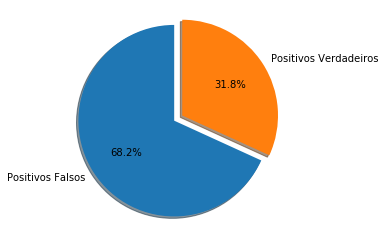

In [72]:
# Gráfico para conclusão




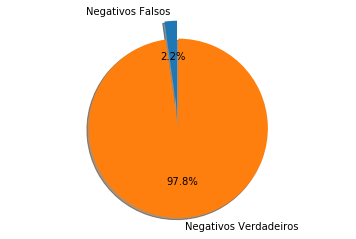

In [73]:

fig1, ax1 = plt.subplots()
ax1.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

___
## Concluindo

Escreva aqui a sua conclusão.<br /> 
Faça um comparativo qualitativo sobre as medidas obtidas.<br />
Explique como são tratadas as mensagens com dupla negação e sarcasmo.<br />
Proponha um plano de expansão. Por que eles devem continuar financiando o seu projeto?<br />

Opcionalmente: 
* Discorrer por que não posso alimentar minha base de Treinamento automaticamente usando o próprio classificador, aplicado a novos tweets.
* Propor diferentes cenários de uso para o classificador Naive-Bayes. Cenários sem intersecção com este projeto.
* Sugerir e explicar melhorias reais no classificador com indicações concretas de como implementar (não é preciso codificar, mas indicar como fazer e material de pesquisa sobre o assunto).


## Limitações e imperfeições do modelo

### É possível concluir que o classificador usado é de certa forma útil, porém impreciso para classificar uma frase como Twitt de Opinião e Tweet Irrelevante. Essa imprecisão vem de quatro principais fatores:

### 1. O Twitter apresenta uma alta quantidade de Tweets de pessoas que comentam sobre o produto, "Guardiões da Galáxia", porém logo em seguida mostram opinião sobre um fator irrelevante ao filme, como por exemplo: "Fui ao cinema ver Guardiões da Galáxia, adorei a sala do shopping x!". Fazendo assim, com que o classificador julgue que aquilo é uma opinião sobre o filme, pela frase conter "adorei".

### 2. Muitas pessoas compartilham vídeos e links no Twitter, tais quais são levados em conta pelo classificador, porém são quase sempre fora de opinião, uma vez que não podem ser levadas em conta, uma vez que a maioria são trailers e anuncios. Porém, se o título do vídeo contém palavras relevantes, o twitt acaba sendo considerado relevantes. Exemplo: "rt gostei @youtube 'Curiosidades sobre Guardioes da Galaxia' ". O comentário seria considerado relevante por conta do "gostei" e do título do filme aparecer num vídeo que não fala sobre opiniões diretamente. Esse fator talvez pudesse ser mais bem analisado por uma inteligência arificial mais rica, que conseguisse analisar vídeos.

### 3. Tweets que comentam utilizam palavras novas para comentar sobre o filme. Dependendo da composição das outras palavras, a classificação pode ser errônea. Por exemplo: "Eu ameeeeeeeeeeei Guardiões da Galáxia. Goooooostei muuuuito". As palavras com vogais repetidas vão ser consideradas novas e portanto diferentes de "amei","gosei" e "muito", então o classificador vai considerar a frase irrelevante, apesar dela ser altamente relevante.

### 4.Palavras podem ser, de certa forma, mal interpretadas. Supondo que por exemplo a palavra "gostei" tenha uma frequência maior nos irrelevantes(talvez por conta da alta quantidade de "gosteis" do Youtube), uma frase como "Gostei do Guardiões da Galáxia" pode acabar sendo considerada irrelevante, uma vez que a frequência de "gostei" é maior em irrelevante, portanto a frequência com Laplace Smoothing também resultará nisso.


## Analisando a perfomance


### Os resultandos comparando a taxa de acerto pela amostra total resultam no seguinte gráfico.(Feito no Excel)




<img src="Gráfico_excel.png">

### Os gráficos a seguir comparam porcentagem de relevantes reais e falsos e de irrelevantes reais e falsos.(Feito no Python)


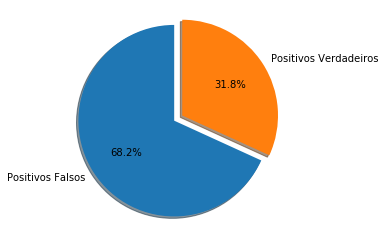

In [87]:
import matplotlib.pyplot as plt

labels = 'Positivos Falsos', 'Positivos Verdadeiros'
labels2 =   'Negativos Falsos','Negativos Verdadeiros'
sizes = [v1, v2]
sizes2 = [v4,v3]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
explode2 = (0.2,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


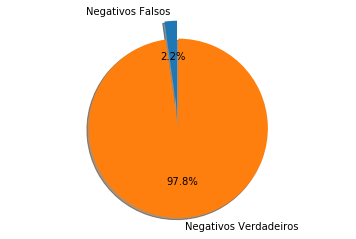

In [88]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### O desvio padrão foi de:
## 0,4175823272

### A correlação foi de:
## 0,4280075381

### A correlação não é alta devido à "baixa" quantidade de acertos postivos, porém o que pode ser extraído dessas informações é que o classificador de Naive-Bayes é um ótimo filtro para chegar em possíveis relevantes, uma vez que raramente classifica relevates como irrelevantes(falsos negativos), apesar de ter uma alta quantidade de falsos postivos.

# Melhorias no projeto

## Com o intuito de aperfeiçoar o projeto, poderiam ser feitas as seguintes modificações:

## - Fazer um banco de dados de palavras sinônimos. Ou seja, no código, se "palavra" não se encontrar na "lista de palavras", checar se "palavra" está na "lista de sinônimos" Assim, quando palavras como "curti" ou outras que não tenham aparecido no treinamento possam ser igualadas à sinônimos, como "gostei"

## - Criar um algoritmo que corrige textos com gramática incorreta. Usando o mesmo principio que o Google utiliza para corrigir pesquisas, o classificador ficaria mais apurado. Seria interessante usar uma API do Google Cloud para isso.

## - Fazer um subclassificador para "muito relevante","médio relevante","pouco relevante","irrelevante", dessa forma, em pesquisas que procurem opiniões mais certeiras, poderia ser disqualificado resuldados pouco relevantes.

## -Fazer um subclassificador com análise de sentimento. Poderia ser utilizado uma segunda classificação que procurasse palavras como "gostei","adorei" e contracenasse com "odeiei". Observando também a presença da palavra "não" e agrupando-a com palavra seguinte. Ex: "Não gostei"

## -Utilizar de algum outro método de classificação, uma vez que o Naive-Bayes não trata com ironias, sarcasmos e duplos negativos. O agrupamento da palavra "não" poderia resolver duplos negativos.




